In [2]:
from CNNTextClassifier import *
import datetime
from utils import *
from evaluate import *

In [3]:
train_set, val_set, test_set, all_categories = loadData('data/')

In [4]:
emb_size=300
out_size=len(all_categories)
batch_size=25
output_dir="results/{:%Y%m%d_%H%M%S}/".format(datetime.now())
epochs=500
lr=0.005
filter_sizes=[1,2,3,5]
num_filters = 36
dropout_rate=0.1
train = True #ako želimo trenirati postavimo na True, a ako samo želimo evaluirati postojeći model onda na False
if train:
    ft = loadFastText('../../')
    weights_matrix = getWeightsMatrix(char_list,ft)
else:
    weights_matrix = torch.from_numpy(np.zeros((len(char_list)+1, emb_size))).float() #dummy matrix da se ne mora ucitavati fasttext

In [5]:
# definiranje modela
model = CNN_Text(out_size, vocab_len, emb_size, weights_matrix, filter_sizes, num_filters, dropout_rate)

In [5]:
## ako zelimo trenirati
from train import *
model_weights_path = train(model, train_set, val_set, batch_size, output_dir, epochs, lr)
print('naučene težine modela u spremljene u:', model_weights_path)

train loss 0.352, val loss 0.290, val accuracy 0.890, and val rmse 0.771
train loss 0.122, val loss 0.241, val accuracy 0.952, and val rmse 0.441
train loss 0.096, val loss 0.301, val accuracy 0.947, and val rmse 0.449
train loss 0.085, val loss 0.393, val accuracy 0.947, and val rmse 0.459
train loss 0.078, val loss 0.492, val accuracy 0.943, and val rmse 0.476
train loss 0.078, val loss 0.441, val accuracy 0.943, and val rmse 0.481
train loss 0.067, val loss 0.541, val accuracy 0.952, and val rmse 0.397
train loss 0.069, val loss 0.486, val accuracy 0.957, and val rmse 0.396
train loss 0.068, val loss 0.520, val accuracy 0.954, and val rmse 0.419
train loss 0.067, val loss 0.528, val accuracy 0.959, and val rmse 0.374
naučene težine modela u spremljene u: results/20221011_205237/model.weights


 --------------Evaluation metrics: ----------------------           
 * test loss: 0.165
 * test accuracy: 0.947,
 * test rmse: 0.469,
 * test microF1: 0.936,
 * test macroF1: 0.947,
 * test weightedF1: 0.947


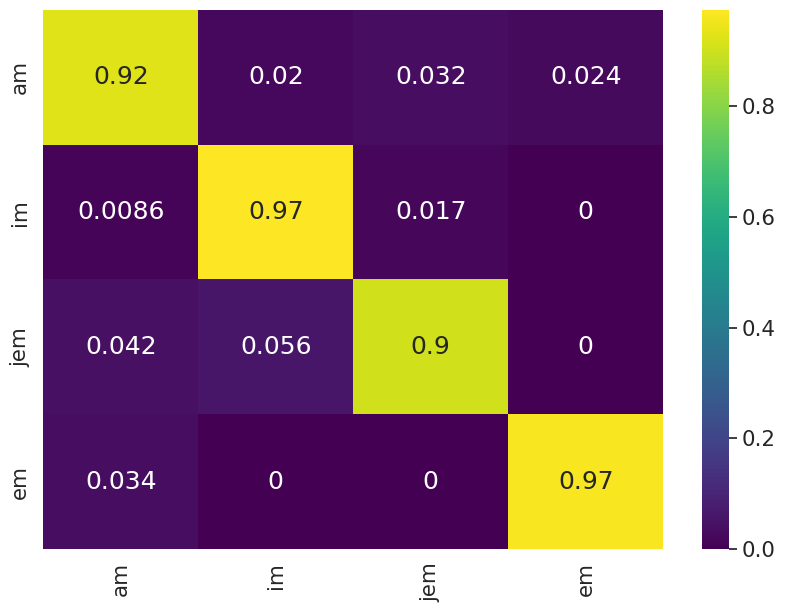

In [6]:
# evaluacija prethodno spremljenog modela
model_weights_path='results/20211117_193445/model.weights'
model_weights_path='results/20221011_201246/model.weights' 
model_weights_path='results/20221011_202720/model.weights'
model_weights_path='results/20221011_205237/model.weights' #zasad najbolji
model = loadModel(model_weights_path)
evaluateOnTestSet(model, test_set,all_categories)

prezent završava na: am


/home/rcoric/klasifikacija/CNNClassification_inftoprez/evaluateModel.py:97: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + suffixes)


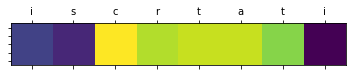

prezent završava na: am


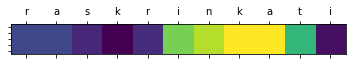

prezent završava na: am


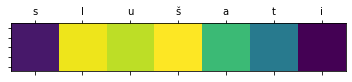

prezent završava na: im


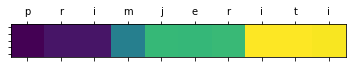

prezent završava na: im


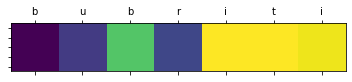

prezent završava na: im


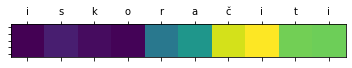

In [17]:
# heatmaps i predikcije za željene glagole
glagoli = ['iscrtati','raskrinkati','slušati','primjeriti','bubriti','iskoračiti']
for verb in glagoli:
    #napravi heatmap
    heatmap(verb,model)